In [1]:
import pandas as pd
from umap.umap_ import UMAP
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Load DataFrame from N7
df = pd.read_csv('embeddings.csv')

In [57]:
df_A = df.copy(deep=True)
df_A = df[df['source'].apply(lambda row: row.startswith('A'))]
len(df_A)

88

In [58]:
df.head(10)

,index,id,embedding,source,topic,document
0,95,ae0dbca3-cc02-44e9-b21d-bb4110f0ffb8,"[0.46299073100090027, 0.36808809638023376, -2....",A00-Abbreviations.txt,0,USC stands for University of San Carlos.\nSVD ...
1,119,da84031c-f3f3-4e2c-aca9-e9f3068247c7,"[-0.01337280310690403, 1.720857858657837, -3.1...",A01-Description.txt,1,TOPIC 1: Description\n\nUniversity of San Carl...
2,90,a68a39f3-0e0a-44e4-97eb-c2da93483cc8,"[0.48381316661834717, 0.8756269812583923, -3.3...","A02-Catholic Identity, Vision Mission and Core...",1,"TOPIC 2: Catholic Identity, Vision, Mission, a..."
3,15,18f81ef3-6772-44a3-a32c-7d6874f0f137,"[-0.26976484060287476, 1.9007909297943115, -3....",A03-The University Seal.txt,1,Topic 3: The University Seal\n\nThe University...
4,37,452a0946-0f7a-4cdc-9dae-973aa0c3adec,"[0.26369062066078186, 1.508581280708313, -3.29...",A04-History.txt,1,Topic 4: History\n\nThe University of San Carl...
5,108,c7242ac4-eb9a-4ca9-a553-0be16a1341e7,"[0.10985635221004486, 0.9737294912338257, -2.8...",A04-History.txt,1,"In 1957, the University became one of the 11 (..."
6,83,9c8ed973-ff53-4a8a-ba6e-6a0657141117,"[-0.2297847419977188, 1.527048110961914, -3.37...",A05-University Saints.txt,1,Topic 5: University Saints\n\nThe three univer...
7,89,a673ffee-3754-4395-83b0-fb37ba8b70b8,"[0.21950210630893707, -0.1793101727962494, -4....",A05-University Saints.txt,1,ST. JOSEPH FREINADEMETZ (1852-1908) \n\nSt. Jo...
8,101,b9622134-99f3-4761-b4e7-a246f5094994,"[-0.3399277627468109, 1.633723258972168, -3.11...",A06-USC Organizational Structure.txt,7,Topic 6: USC Organizational Structure\n\nThe U...
9,44,5286140a-903e-4923-839d-846cb3b5065c,"[-0.2553839683532715, 1.5201339721679688, -2.6...",A07-Admission.txt,2,Topic 7: Admission\n\nThe academic admission r...


In [59]:
# Number of dimensions of embedding per document 
# Note that we use UMAP to reduce this to 2 dimensions
len(df['embedding'][0][1:-1].split(', '))

768

In [60]:
# Prepare embeddings
# Prepare the embeddings for UMAP
array = [row for row in df_A["embedding"]]
array_float = [[float(x) for x in row[1:-1].split(', ')] for row in array]

# Prepare the embeddings for UMAP
embeddings = np.array(array_float)

# Reduce dimensionality with UMAP
reducer = UMAP(random_state = 2)
embedding_reduced = reducer.fit_transform(embeddings)

C:\Users\Marc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [80]:
cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'red', 4: 'skyblue', 5:'salmon', 6:'orange', 7:'maroon', 8:'crimson', 9:'black'}
topic_desc = {0: 'Abbreviations', 1: 'About USC', 2: 'Admission', 3: 'Enrollment', 4: 'Fees/Discounts', 5:'Acads/Honors', 6:'Discpline/Conduct', 7:'Orgnizations/Offices', 8:'Motor Vehicle Pass', 9:'UG Programs'}

df_A['colors'] = df_A['topic'].apply(lambda l: cluster_colors[l])
df_A['topic_desc'] = df_A['topic'].apply(lambda l: topic_desc[l])

C:\Users\Marc\AppData\Local\Temp\ipykernel_7024\2135065804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['colors'] = df_A['topic'].apply(lambda l: cluster_colors[l])
C:\Users\Marc\AppData\Local\Temp\ipykernel_7024\2135065804.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['topic_desc'] = df_A['topic'].apply(lambda l: topic_desc[l])


C:\Users\Marc\AppData\Local\Temp\ipykernel_7024\3607298758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['embed_reduced_x'] = embedding_reduced[:,  0]
C:\Users\Marc\AppData\Local\Temp\ipykernel_7024\3607298758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A['embed_reduced_y'] = embedding_reduced[:,  1]


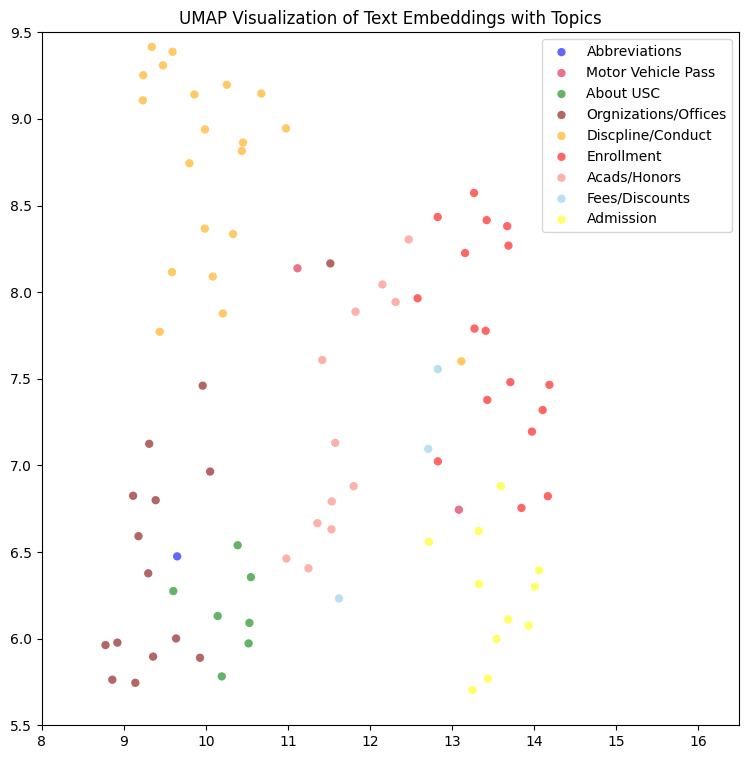

In [81]:
df_A['embed_reduced_x'] = embedding_reduced[:,  0]
df_A['embed_reduced_y'] = embedding_reduced[:,  1]

plt.figure(figsize=(9, 9))
for i, dff in df_A.groupby("colors"):
    plt.scatter(dff['embed_reduced_x'], dff['embed_reduced_y'], c=dff['colors'], alpha=0.6,
                edgecolors='none', label=f"{dff['topic_desc'].values[0]}")

# Add labels and title
plt.title(f"UMAP Visualization of Text Embeddings with Topics")
plt.axis([8, 16.5, 5.5, 9.5])
plt.legend(loc=1)
plt.show()

In [82]:
# Prepare embeddings
# Prepare the embeddings for UMAP
array2 = [row for row in df["embedding"]]
array_float2 = [[float(x) for x in row[1:-1].split(', ')] for row in array2]

# Prepare the embeddings for UMAP
embeddings2 = np.array(array_float2)

# Reduce dimensionality with UMAP
reducer2 = UMAP(random_state = 2)
embedding_reduced2 = reducer2.fit_transform(embeddings2)

C:\Users\Marc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [85]:
cluster_colors = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'red', 4: 'skyblue', 5:'salmon', 6:'orange', 7:'maroon', 8:'crimson', 9:'black'}
topic_desc = {0: 'Abbreviations', 1: 'About USC', 2: 'Admission', 3: 'Enrollment', 4: 'Fees/Discounts', 5:'Acads/Honors', 6:'Discpline/Conduct', 7:'Orgnizations/Offices', 8:'Motor Vehicle Pass', 9:'UG Programs'}

df['colors'] = df['topic'].apply(lambda l: cluster_colors[l])
df['topic_desc'] = df['topic'].apply(lambda l: topic_desc[l])

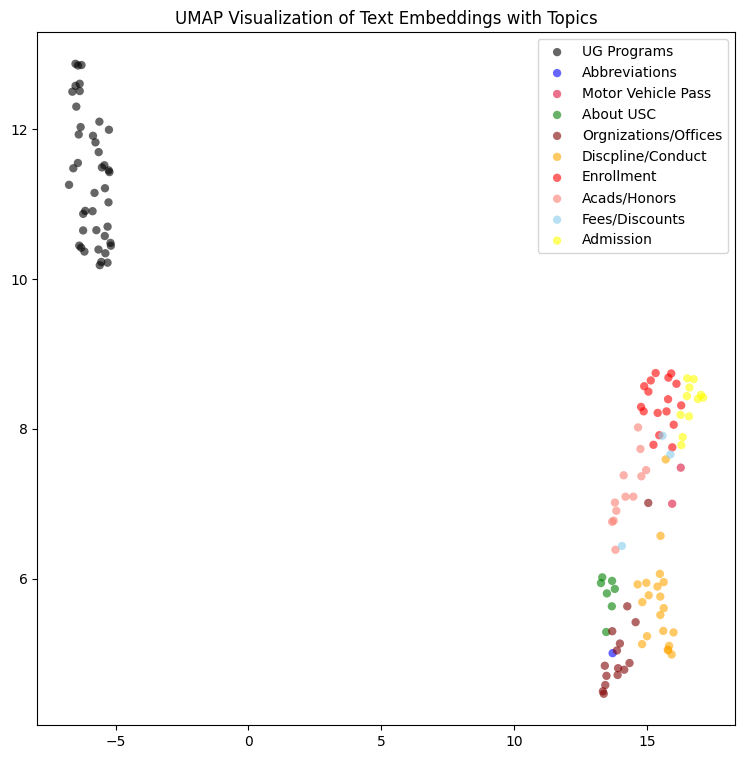

In [87]:
df['embed_reduced_x'] = embedding_reduced2[:,  0]
df['embed_reduced_y'] = embedding_reduced2[:,  1]

plt.figure(figsize=(9, 9))
for i, dff in df.groupby("colors"):
    plt.scatter(dff['embed_reduced_x'], dff['embed_reduced_y'], c=dff['colors'], alpha=0.6,
                edgecolors='none', label=f"{dff['topic_desc'].values[0]}")

# Add labels and title
plt.title(f"UMAP Visualization of Text Embeddings with Topics")
plt.legend(loc=1)
plt.show()